In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

# MitoCarta parsing

In [2]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2ID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['gene_ids'] = ''
for i in range(len(MitoPW)):
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2ID[gene]) == float : continue
        MitoPW['gene_ids'][i] += name2ID[gene].replace('|',',') + ','
    MitoPW['gene_ids'][i] = MitoPW['gene_ids'][i][:-1]
MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW[:5])

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_54614/644145054.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MitoPW['gene_ids'][i] += name2ID[gene].replace('|',',') + ','
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_54614/644145054.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MitoPW['gene_ids'][i] = MitoPW['gene_ids'][i][:-1]


,MitoPathway Hierarchy,Genes,PW level,gene_ids
MitoPathway,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0..."


# Plotting

In [3]:
PT_count = pd.read_excel(f'{Project}/Results/Tables/Proteome/adi_proteome_3-2.xlsx').drop(columns=['Description','Ref.1','Ref.2'])
PT_count = PT_count.rename(columns={'Uniprot' : 'uniprot_id',
                        '04_day0' : 'PT0a',
                        '07_day0' : 'PT0b',
                        '10_day0' : 'PT0c',
                        '05_day4' : 'PT4a',
                        '08_day4' : 'PT4b',
                        '11_day4' : 'PT4c',
                        '06_day8' : 'PT8a',
                        '09_day8' : 'PT8b',
                        '12_day8' : 'PT8c'})

display(PT_count)

PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id')).drop_duplicates(subset='gene_id')
PT = pd.merge(PT_conv, PT_count, on='uniprot_id').drop(columns='uniprot_id')

display(PT)

,uniprot_id,PT0a,PT0b,PT0c,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,Q9CR37,1.693290e+05,1.496630e+05,1.490909e+05,1.844660e+05,2.016059e+05,1.814890e+05,2.889049e+05,2.936150e+05,2.015100e+05
1,P54869,3.281019e+05,4.591652e+05,3.856480e+05,2.066622e+06,1.415515e+06,2.458471e+06,7.100138e+05,9.828228e+05,8.119442e+05
2,Q99M31,6.523043e+06,6.982720e+06,6.368034e+06,6.381714e+06,7.662582e+06,6.510318e+06,6.107200e+06,6.328169e+06,5.523205e+06
3,Q7TSS2,4.173766e+06,4.451297e+06,4.538361e+06,2.128894e+06,3.956585e+06,2.258005e+06,2.224830e+06,2.202816e+06,1.971017e+06
4,Q71FD5,4.581468e+05,4.790679e+05,4.351729e+05,6.583832e+05,6.367181e+05,6.612349e+05,7.045228e+05,7.042540e+05,6.369008e+05
...,...,...,...,...,...,...,...,...,...,...
5392,Q9JJ00,2.687962e+06,2.877811e+06,2.996009e+06,6.077719e+05,1.380807e+06,8.615510e+05,8.188600e+05,6.809649e+05,8.419740e+05
5393,Q99LL5,2.003621e+06,2.255631e+06,2.181153e+06,1.310549e+06,2.054065e+06,1.460465e+06,1.009178e+06,1.040777e+06,1.030952e+06
5394,P70441,7.526243e+06,7.909776e+06,7.718007e+06,3.334555e+06,6.667487e+06,4.105355e+06,4.330949e+06,4.373483e+06,4.174260e+06
5395,Q9Z2U0,5.487924e+07,4.858728e+07,5.781606e+07,4.250175e+07,6.408436e+07,4.274319e+07,5.249991e+07,5.582863e+07,5.144550e+07


,gene_id,PT0a,PT0b,PT0c,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,ENSMUSG00000104713,9.824902e+05,9.310571e+05,1.351944e+06,9.032753e+05,1.139155e+06,1.088446e+06,1.468242e+06,1.620111e+06,2.019030e+06
1,ENSMUSG00000031095,7.986511e+06,8.606126e+06,8.427422e+06,9.883604e+06,1.100928e+07,9.846102e+06,8.597940e+06,9.391107e+06,7.958887e+06
2,ENSMUSG00000034931,1.160068e+06,1.167761e+06,1.050725e+06,1.578465e+06,1.328215e+06,1.480099e+06,2.927169e+06,2.679092e+06,2.462199e+06
3,ENSMUSG00000074582,1.035087e+07,1.029195e+07,1.041293e+07,1.183552e+07,1.407204e+07,1.176078e+07,1.254854e+07,1.301809e+07,1.116281e+07
4,ENSMUSG00000018363,6.867210e+05,7.402816e+05,7.174721e+05,6.430412e+05,9.214158e+05,6.651164e+05,5.143428e+05,5.323040e+05,4.535639e+05
...,...,...,...,...,...,...,...,...,...,...
4870,ENSMUSG00000031485,1.513417e+07,1.573818e+07,1.528468e+07,1.823031e+07,2.177762e+07,1.823636e+07,2.123049e+07,2.060829e+07,1.860732e+07
4871,ENSMUSG00000032602,1.398647e+07,1.075592e+07,1.209799e+07,6.001931e+07,3.597648e+07,5.130465e+07,1.036732e+08,1.177059e+08,8.153832e+07
4872,ENSMUSG00000020363,9.883659e+06,1.181710e+07,1.140410e+07,5.369023e+06,1.020506e+07,6.383268e+06,6.515138e+06,6.108619e+06,6.295558e+06
4873,ENSMUSG00000022779,1.932080e+06,2.005126e+06,2.001019e+06,1.866849e+06,2.365127e+06,1.970302e+06,1.993377e+06,2.257551e+06,1.712354e+06


In [4]:
# Plot data
MTPWs = ['CI subunits',
         'CII subunits',
         'CIII subunits',
         'CIV subunits',
         'CV subunits']

reps = ['a','b','c']
data = []
for MTPW in MTPWs:
    genes = pd.DataFrame({'gene_id' : MitoPW.loc[MTPW,'gene_ids'].split(',')})  
    tmp = pd.merge(genes, PT[['gene_id']+[f'PT{day}{rep}' for day in ['0','4','8'] for rep in reps]], on='gene_id')
    data.append(tmp.drop(columns='gene_id').sum())

data = pd.concat(data, axis=1).T.rename(index={i:MTPW for i,MTPW in enumerate(MTPWs)})
for col in data:
    data[col] = data[col] / sum(data[col]) * 100
# display(data)

plot_data = data.T
plot_data['Day'] = plot_data.index.str[2]
plot_data['rep'] = plot_data.index.str[3]

display(plot_data)

,CI subunits,CII subunits,CIII subunits,CIV subunits,CV subunits,Day,rep
PT0a,24.571746,7.001195,7.780822,18.588875,42.057361,0,a
PT0b,25.067561,6.086681,7.199975,19.765764,41.880020,0,b
PT0c,24.767911,6.032009,7.451428,19.507576,42.241076,0,c
PT4a,24.108537,8.251917,10.865402,13.677070,43.097074,4,a
PT4b,22.137602,7.163784,9.948891,15.337323,45.412401,4,b
PT4c,24.097464,8.065186,10.189912,14.432133,43.215306,4,c
PT8a,22.160075,13.438822,11.631579,11.643285,41.126239,8,a
PT8b,22.953372,13.643379,11.872634,11.838412,39.692203,8,b
PT8c,23.397948,11.230077,10.773154,12.231138,42.367683,8,c


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_54614/1702441017.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Day", y="CII subunits",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_54614/1702441017.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=plot_data, x="Day", y="CII subunits",


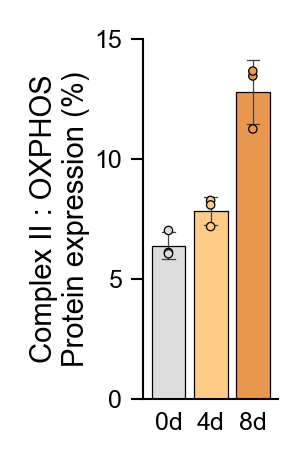

<Figure size 640x480 with 0 Axes>

In [6]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [1.2]*nrow
width_ratios = [0.45]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

sns.barplot(data=plot_data, x="Day", y="CII subunits",
            palette=['#DDDDDD','#FFCC88','#E8974D'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=plot_data, x="Day", y="CII subunits",
              palette=['#DDDDDD','#FFCC88','#E8974D'],
              size=2, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)

ax.set_xlim(-0.6, 2.6)
ax.set_xticks([0,1,2])
ax.set_yticks([0,5,10,15])
ax.set_xticklabels(['0d','4d', '8d'])
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('Complex II : OXPHOS\nProtein expression (%)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.savefig('OXPHOS_PT_Exp-ratio_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()